<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-generation/stable-cascade-first-contact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -qq git+https://github.com/kashif/diffusers.git@a3dc21385b7386beb3dab3a9845962ede6765887
!pip install -qq accelerate
!pip install -qq peft

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 5.1 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableCascadeDecoderPipeline, StableCascadePriorPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
device = "cuda"
num_images_per_prompt = 2

In [4]:
prior = StableCascadePriorPipeline.from_pretrained("stabilityai/stable-cascade-prior", torch_dtype=torch.bfloat16).to(device)
decoder = StableCascadeDecoderPipeline.from_pretrained("stabilityai/stable-cascade",  torch_dtype=torch.float16).to(device)

model_index.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/7.18G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

decoder/config.json:   0%|          | 0.00/885 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

vqgan/config.json:   0%|          | 0.00/329 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/36.8M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt = "jack the ripper in a london alley, gaslight, illustration 8k"
negative_prompt = ""

prior_output = prior(
    prompt=prompt,
    height=1024,
    width=1024,
    negative_prompt=negative_prompt,
    guidance_scale=4.0,
    num_images_per_prompt=num_images_per_prompt,
    num_inference_steps=20
)
decoder_output = decoder(
    image_embeddings=prior_output.image_embeddings.half(),
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=0.0,
    output_type="pil",
    num_inference_steps=10
).images

#Now decoder_output is a list with your PIL images


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

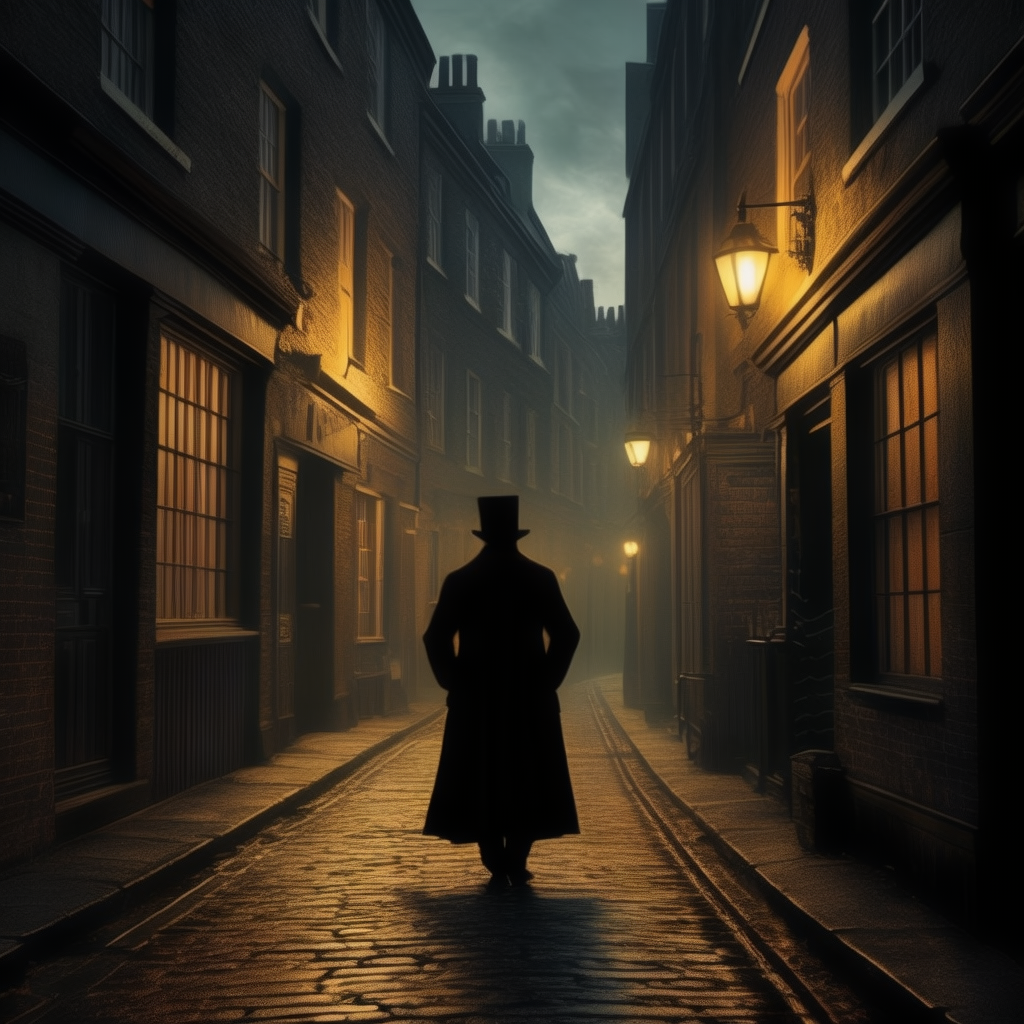

In [6]:
decoder_output[0]